<a href="https://colab.research.google.com/github/KseniiaTsyganova/ML_classic_churn_analysis/blob/main/ML_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Codebook
<br>

`telecom_users.csv` contains the following values:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – customer id<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` - gender of the client (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` - whether the client is a pensioner (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` - whether the client is married (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` - does the client have dependents (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` - how many months the person has been a client of the company<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – whether telephone service is connected (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` - whether multiple phone lines are connected (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` - client's Internet provider (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – whether the online security service is enabled (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – whether online backup service is enabled (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` - whether the client has equipment insurance (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – whether technical support service is connected (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` - whether the streaming TV service is connected (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` - whether the streaming movie theater service is connected (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – client contract type (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` - whether the client uses paperless billing (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` - current monthly charge<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` - the total amount that the client paid for the services for the entire time<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` - whether there was a churn (Yes or No)<br>

# 1. Description of data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Dataframe with data about users of a telecommunication company

telecom_df = pd.read_csv('/content/telecom_users.csv')
telecom_df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
# Information about the dataframe

telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [4]:
# There is no missing data in the dataframe, so it doesn't need to be filled in

telecom_df.isna().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# However, most of the data is represented as an object, it is worth converting it to categorical variables

In [6]:
# 0 - male, 1 - female
telecom_df.gender = np.where(telecom_df.gender == 'Male', 0, 1)

# 0 - single, 1 - married
telecom_df.Partner = np.where(telecom_df.Partner == 'No', 0, 1)

# 0 - no dependents, 1 - dependents
telecom_df.Dependents = np.where(telecom_df.Dependents == 'No', 0, 1)

In [7]:
# Let's see what are the indicators for the duration of use of the company's services

print(f"Maximum time of using the company's services: {telecom_df.tenure.max()} мес")

print(f'The minimum time of using the services of the company: {telecom_df.tenure.min()} мес')

print(f"Median time spent using the company's services: {telecom_df.tenure.median()} мес")

Maximum time of using the company's services: 72 мес
The minimum time of using the services of the company: 0 мес
Median time spent using the company's services: 29.0 мес


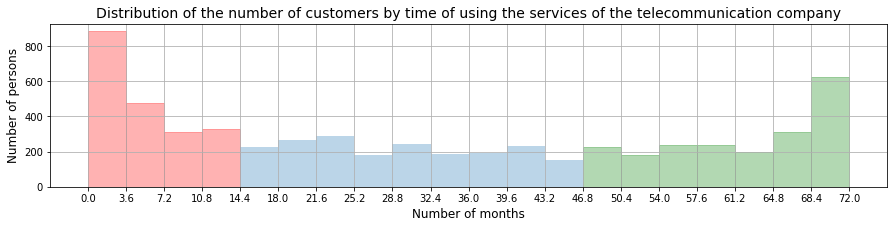

In [11]:
# Visualize data on the duration of use of services by the company's clients

plt.figure(figsize=(15, 3))
n, bins, patches = plt.hist(telecom_df.tenure, bins=20, alpha=0.3)
for i, patch in enumerate(patches):
    if i in [0, 1, 2, 3]:
        patch.set_color('red')
    elif i in list(range((len(patches) - 7), len(patches), 1)):
        patch.set_color('green')
plt.title('Distribution of the number of customers by time of using the services of the telecommunication company', fontsize=14)
plt.xticks(bins)
plt.xlabel('Number of months', fontsize=12)
plt.ylabel('Number of persons', fontsize=12)
plt.grid()
plt.show()

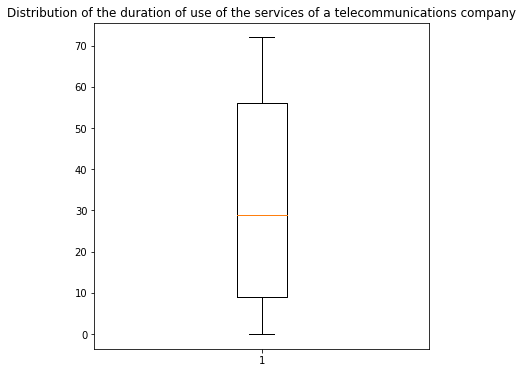

In [12]:
plt.figure(figsize=(6, 6))
plt.boxplot(telecom_df.tenure)
plt.title('Distribution of the duration of use of the services of a telecommunications company')
plt.show()

# All values are within a confidence interval of 1.5 std, no outliers observed

In [13]:
# We will divide users into 3 categories depending on the duration of use of services and
# add a new categorical variable:
# 0 - new clients, duration of use of services less than 12 months
# 1 - intermediate segment
# 2 - regular customers, duration of use over 60 months

telecom_df['CategoricalTenure'] = telecom_df['tenure']
telecom_df['CategoricalTenure_temp'] = pd.qcut(telecom_df.tenure, 3) 
telecom_df.CategoricalTenure_temp.unique()

[(47.0, 72.0], (14.0, 47.0], (-0.001, 14.0]]
Categories (3, interval[float64, right]): [(-0.001, 14.0] < (14.0, 47.0] < (47.0, 72.0]]

In [14]:
telecom_df.loc[telecom_df['CategoricalTenure'] <= 14, 'CategoricalTenure'] = 0
telecom_df.loc[(telecom_df['CategoricalTenure'] > 14) & (telecom_df['CategoricalTenure'] <= 47), 'CategoricalTenure'] = 1
telecom_df.loc[telecom_df['CategoricalTenure'] > 47, 'CategoricalTenure'] = 2

telecom_df['CategoricalTenure'] = telecom_df['CategoricalTenure'].astype(int)

In [15]:
# no phone service - 0, phone service - 1
telecom_df.PhoneService = np.where(telecom_df.PhoneService == 'No', 0, 1)


# No phone service - 0, no multiple lines - 1, multiple lines - 2
telecom_df['MultipleLines'] = telecom_df['MultipleLines'].map({'No phone service': 0, 'No': 1, 'Yes': 2}).astype(int)

# no internet service - 0, 'DSL' - 1, 'Fiber optic' - 2
telecom_df['InternetService'] = telecom_df['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2}).astype(int)

# no internet service - 0, no online security - 1, online security - 2
telecom_df['OnlineSecurity'] = telecom_df['OnlineSecurity'].map({'No internet service': 0, 'No': 1, 'Yes': 2}).astype(int)

# no internet service - 0, no online back up - 1, online back up - 2
telecom_df['OnlineBackup'] = telecom_df['OnlineBackup'].map({'No internet service': 0, 'No': 1, 'Yes': 2}).astype(int)

# no internet service - 0, no device protection - 1, device protection - 2
telecom_df['DeviceProtection'] = telecom_df['DeviceProtection'].map({'No internet service': 0, 'No': 1, 'Yes': 2}).astype(int)

# no internet service - 0, no tech support - 1, tech support - 2
telecom_df['TechSupport'] = telecom_df['TechSupport'].map({'No internet service': 0, 'No': 1, 'Yes': 2}).astype(int)

# no internet service - 0, no streaming TV - 1, streaming TV - 2
telecom_df['StreamingTV'] = telecom_df['StreamingTV'].map({'No internet service': 0, 'No': 1, 'Yes': 2}).astype(int)

# no internet service - 0, no streaming movies - 1, streaming movies - 2
telecom_df['StreamingMovies'] = telecom_df['StreamingMovies'].map({'No internet service': 0, 'No': 1, 'Yes': 2}).astype(int)

# month-to-month contract - 0, one year contract - 1, two year contract - 2
telecom_df['Contract'] = telecom_df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2}).astype(int)

# no paperless billing - 0, paperless billing - 1
telecom_df['PaperlessBilling'] = np.where(telecom_df['PaperlessBilling'] == 'No', 0, 1)

#Type on payment: electronic check - 0, mailed check - 1, bank transfer (automatic) - 2, credict card (automatic) - 3
telecom_df['PaymentMethod'] = telecom_df['PaymentMethod'].map({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}).astype(int)


In [16]:
# Now we need to consider customer payments

print(f'The minimum value of the monthly payment: {telecom_df.MonthlyCharges.min()}')

print(f'The maximum value of the monthly payment: {telecom_df.MonthlyCharges.max()}')

print(f'The median value of the monthly payment: {telecom_df.MonthlyCharges.median()}')

The minimum value of the monthly payment: 18.25
The maximum value of the monthly payment: 118.75
The median value of the monthly payment: 70.4


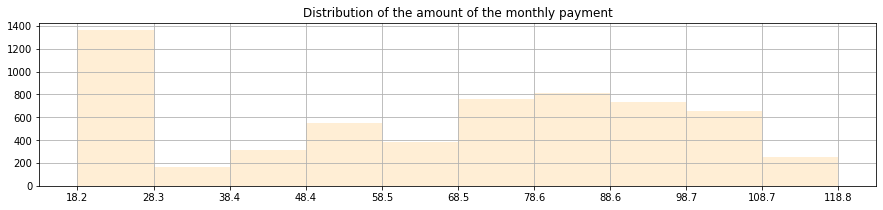

In [17]:
plt.figure(figsize=(15, 3))
n, bins, parches = plt.hist(telecom_df.MonthlyCharges, bins=10, alpha=0.5, color='navajowhite')
plt.xticks(bins)
plt.grid()
plt.title('Distribution of the amount of the monthly payment')
plt.show()

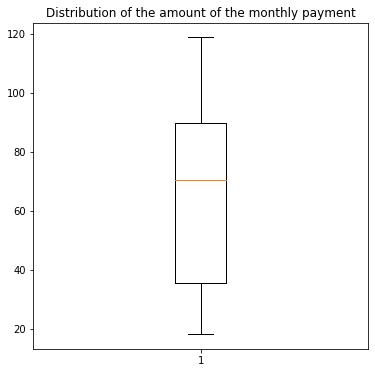

In [18]:
plt.figure(figsize=(6, 6))
plt.boxplot(telecom_df.MonthlyCharges)
plt.title('Distribution of the amount of the monthly payment')
plt.show()

# All values are within a confidence interval of 1.5 std, no outliers observed

In [19]:
# Create a CategoricalMonthlyCharges column containing values about the relation to one of the five classes by the size of the monthly payment

telecom_df['CategoricalMonthlyCharges'] = telecom_df['MonthlyCharges']
telecom_df['CategoricalMonthlyCharges_temp'] = pd.cut(telecom_df['MonthlyCharges'], 5)

telecom_df.CategoricalMonthlyCharges_temp.unique()

[(18.15, 38.35], (78.55, 98.65], (58.45, 78.55], (38.35, 58.45], (98.65, 118.75]]
Categories (5, interval[float64, right]): [(18.15, 38.35] < (38.35, 58.45] < (58.45, 78.55] <
                                           (78.55, 98.65] < (98.65, 118.75]]

In [20]:
# Replace the values in the MonthlyCharges column with the class number

telecom_df.loc[telecom_df['MonthlyCharges'] <= 38.85, 'CategoricalMonthlyCharges'] = 0
telecom_df.loc[(telecom_df['MonthlyCharges'] > 38.85) & (telecom_df['MonthlyCharges'] <= 58.45), 'CategoricalMonthlyCharges'] = 1
telecom_df.loc[(telecom_df['MonthlyCharges'] > 58.45) & (telecom_df['MonthlyCharges'] <= 78.55), 'CategoricalMonthlyCharges'] = 2
telecom_df.loc[(telecom_df['MonthlyCharges'] > 78.55) & (telecom_df['MonthlyCharges'] <= 98.65), 'CategoricalMonthlyCharges'] = 3
telecom_df.loc[telecom_df['MonthlyCharges'] > 98.65, 'CategoricalMonthlyCharges'] = 4

telecom_df['CategoricalMonthlyCharges'] = telecom_df['CategoricalMonthlyCharges'].astype(int)

In [21]:
# Convert the data type of the Total Charges column from object to float

telecom_df['TotalCharges'] = [float(i) if ' ' not in i else 0. for i in telecom_df.TotalCharges]

In [22]:

print(f'Minimum deposited amount: {telecom_df.TotalCharges.min()}')

print(f'Maximum deposited amount: {telecom_df.TotalCharges.max()}')

print(f'Median value of the payment made: {telecom_df.TotalCharges.median()}')

Minimum deposited amount: 0.0
Maximum deposited amount: 8684.8
Median value of the payment made: 1408.575


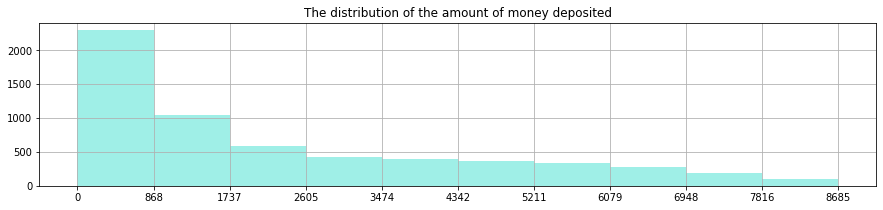

In [23]:
plt.figure(figsize=(15, 3))
n, bins, patches = plt.hist(telecom_df.TotalCharges, alpha=0.5, color='turquoise')
plt.title('The distribution of the amount of money deposited')
plt.xticks(bins)
plt.grid()
plt.show()

# There is a clear asymmetry in the distribution of data with a bias towards smaller values

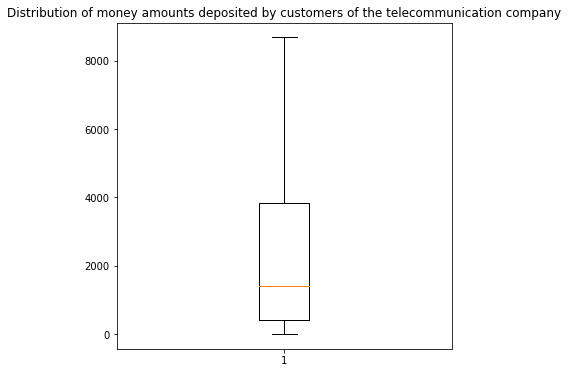

In [24]:
plt.figure(figsize=(6, 6))
plt.boxplot(telecom_df.TotalCharges)
plt.title('Distribution of money amounts deposited by customers of the telecommunication company')
plt.show()

# All values are within a confidence interval of 1.5 std, no outliers observed

In [25]:
# now let's create a new column containing data about the relation of the object to one of the five classes according to the amount of money deposited

telecom_df['CategoricalTotalCharges_temp'] = pd.cut(telecom_df['TotalCharges'], 5)

telecom_df.CategoricalTotalCharges_temp.unique()

[(-8.685, 1736.96], (3473.92, 5210.88], (1736.96, 3473.92], (5210.88, 6947.84], (6947.84, 8684.8]]
Categories (5, interval[float64, right]): [(-8.685, 1736.96] < (1736.96, 3473.92] <
                                           (3473.92, 5210.88] < (5210.88, 6947.84] <
                                           (6947.84, 8684.8]]

In [26]:
telecom_df['CategoricalTotalCharges'] = telecom_df['TotalCharges']

telecom_df.loc[telecom_df['TotalCharges'] <= 1736.96, 'CategoricalTotalCharges'] = 0
telecom_df.loc[(telecom_df['TotalCharges'] > 1736.96) & (telecom_df['TotalCharges'] <= 3473.92), 'CategoricalTotalCharges'] = 1
telecom_df.loc[(telecom_df['TotalCharges'] > 3473.92) & (telecom_df['TotalCharges'] <= 5210.88), 'CategoricalTotalCharges'] = 2
telecom_df.loc[(telecom_df['TotalCharges'] > 5210.88) & (telecom_df['TotalCharges'] <= 6947.84), 'CategoricalTotalCharges'] = 3
telecom_df.loc[telecom_df['TotalCharges'] > 6947.84, 'CategoricalTotalCharges'] = 4

telecom_df['CategoricalTotalCharges'] = telecom_df['CategoricalTotalCharges'].astype(int)

In [27]:
# Transform the target variable

telecom_df['Churn'] = np.where(telecom_df['Churn'] == 'No', 0, 1)

In [28]:
# Remove extra columns

drop_columns = ['Unnamed: 0', 'customerID', 'CategoricalTenure_temp', 'CategoricalMonthlyCharges_temp', 'CategoricalTotalCharges_temp']

telecom_df.drop(drop_columns, axis=1, inplace=True)

In [29]:
# Add columns related to the number of services connected to the company's clients:
# Main Services - MainService
# Additional Services - AdditionalService
# Total Services - TotalService
# First, add an Internet column that says whether the client is connected to the Internet, regardless of the provider

telecom_df['Internet'] = np.where(telecom_df['InternetService'] == 0, 0, 1)
telecom_df['MainService'] = telecom_df['Internet'] + telecom_df['PhoneService']
telecom_df['AdditionalService'] = (telecom_df['MultipleLines'] + telecom_df['OnlineSecurity'] + telecom_df['OnlineBackup'] + telecom_df['DeviceProtection'] + telecom_df['TechSupport'] + telecom_df['StreamingTV'] + telecom_df['StreamingMovies']) // 2
telecom_df['TotalService'] = telecom_df['MainService'] + telecom_df['AdditionalService']

In [30]:
# Dataframe

telecom_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CategoricalTenure,CategoricalMonthlyCharges,CategoricalTotalCharges,Internet,MainService,AdditionalService,TotalService
0,0,0,1,1,72,1,2,0,0,0,0,0,0,0,2,0,3,24.10,1734.65,0,2,0,0,0,1,1,2
1,1,0,0,0,44,1,1,2,1,2,2,1,2,1,0,1,3,88.15,3973.20,0,1,3,2,1,2,5,7
2,1,1,1,0,38,1,2,2,1,1,1,1,1,1,0,1,2,74.95,2869.85,1,1,2,1,1,2,4,6
3,0,0,0,0,4,1,1,1,1,1,1,1,1,2,0,1,0,55.90,238.50,0,0,1,0,1,2,4,6
4,0,0,0,0,2,1,1,1,2,1,2,1,1,1,0,0,0,53.45,119.50,0,0,1,0,1,2,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,0,1,0,1,1,1,2,2,1,1,1,2,2,0,1,0,95.00,95.00,1,0,3,0,1,2,5,7
5982,1,0,1,1,23,1,2,1,2,2,2,2,2,2,2,1,3,91.10,2198.30,0,1,3,1,1,2,7,9
5983,0,0,1,1,12,1,1,0,0,0,0,0,0,0,0,1,0,21.15,306.05,0,0,0,0,0,1,0,1
5984,0,1,0,0,12,1,2,2,1,1,2,1,2,2,0,1,0,99.45,1200.15,1,0,4,0,1,2,5,7


# 2. Research dependencies and formulate hypotheses

In [31]:
# Now let's see how many people churn
# We see that the classes are not balanced, this indicates the need to use certain metrics
# to evaluate the quality of machine learning
# in our case this is recall
# since our goal is to minimize the risk of missing even one positive result

telecom_df.groupby(['Churn'])['Churn'].count()

Churn
0    4399
1    1587
Name: Churn, dtype: int64

In [32]:
# Let's see if the company has debts and create a 'Debt' column containing the amount of debt

telecom_df['Debt'] = telecom_df.tenure * telecom_df.MonthlyCharges - telecom_df.TotalCharges
telecom_df['Debt'] = np.where(telecom_df.Debt > 0, telecom_df.Debt, 0)
telecom_df['IsDebtor'] = np.where(telecom_df.Debt > 0, 1, 0)

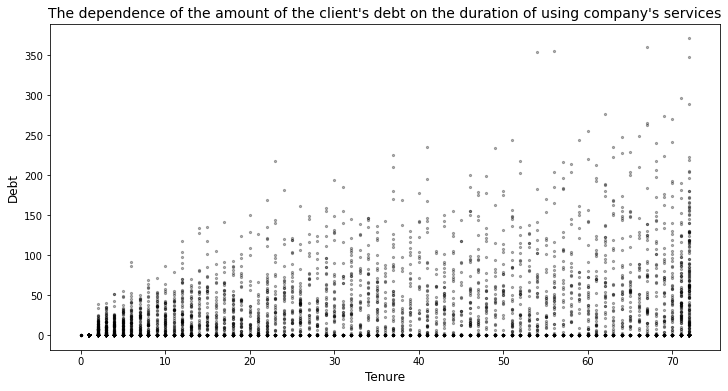

In [33]:
# Let's see how the debt amount changes depending on the duration of using the company's services

plt.figure(figsize=(12, 6))
plt.scatter(telecom_df.tenure, telecom_df.Debt, s=5, c='k', alpha=0.3)
plt.title("The dependence of the amount of the client's debt on the duration of using company's services", fontsize=14)
plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Debt', fontsize=12)
plt.show()

# We see that most debts of small sizes, regardless of the duration of using services of the company,
# however, as the duration increases, large debts appear

In [34]:
# Let's see how the presence of debt affects the churn

debt_df = pd.crosstab(telecom_df.Churn, telecom_df.IsDebtor)
debt_df

IsDebtor,0,1
Churn,,
0,2301,2098
1,951,636


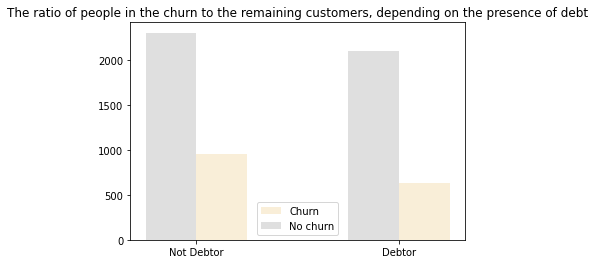

In [35]:
plt.figure(figsize=(6, 4))
plt.bar(debt_df.columns, debt_df.iloc[1, :], width=0.25, align='edge', color = 'wheat', alpha=0.5, label='Churn')
plt.bar(debt_df.columns, debt_df.iloc[0, :], width=-0.25, align='edge', color='silver', alpha=0.5, label = 'No churn')
plt.legend()
plt.xticks([0, 1], ['Not Debtor', 'Debtor'])
plt.title('The ratio of people in the churn to the remaining customers, depending on the presence of debt', fontsize=12)
plt.show()

# The graph shows that the presence of debt does not affect the churn, and yet more people from the churn did not have debt

In [36]:
# Now let's turn to the ratio of the status of a pensioner and the number of people who have gone into churn

senior_df = pd.crosstab(telecom_df.Churn, telecom_df.SeniorCitizen)
senior_df

SeniorCitizen,0,1
Churn,,
0,3835,564
1,1185,402


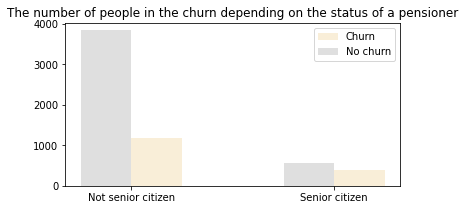

In [37]:
plt.figure(figsize=(6, 3))
plt.bar(senior_df.columns, senior_df.iloc[1, :], width=0.25, color='wheat', alpha=0.5, align='edge', label='Churn')
plt.bar(senior_df.columns, senior_df.iloc[0, :], width=-0.25, color='silver', alpha=0.5, align='edge', label='No churn')
plt.xticks([0, 1], ['Not senior citizen', 'Senior citizen'])
plt.legend()
plt.title('The number of people in the churn depending on the status of a pensioner', fontsize=12)
plt.show()

# It can be seen from the data and graph that the number of pensioners in the churn is not too different from the number of pensioners
# who are still using the company's services
# Therefore, you need to pay attention to this focus group, understand what is the reason for the churn

In [38]:
# Let's test one of the hypotheses regarding the fact that pensioners use the phone most often, but less the Internet
# Therefore, perhaps the reason is the quality of the telephone service provided

phone_df = pd.crosstab(telecom_df.Churn, telecom_df.PhoneService)
phone_df

PhoneService,0,1
Churn,,
0,441,3958
1,149,1438


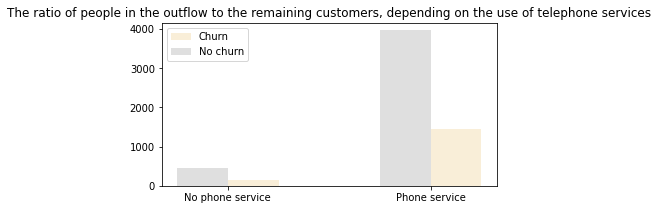

In [39]:
plt.figure(figsize=(6, 3))
plt.bar(phone_df.columns, phone_df.iloc[1, :], width=0.25, align='edge', color='wheat', alpha=0.5, label='Churn')
plt.bar(phone_df.columns, phone_df.iloc[0, :], width=-0.25, align='edge', color='silver', alpha=0.5, label='No churn')
plt.legend()
plt.xticks([0, 1], ['No phone service', 'Phone service'])
plt.title('The ratio of people in the outflow to the remaining customers, depending on the use of telephone services', fontsize=12)
plt.show()

In [40]:
# Now let's turn to the Internet services

internet_df = pd.crosstab(telecom_df.Churn, telecom_df.Internet)
internet_df

Internet,0,1
Churn,,
0,1192,3207
1,99,1488


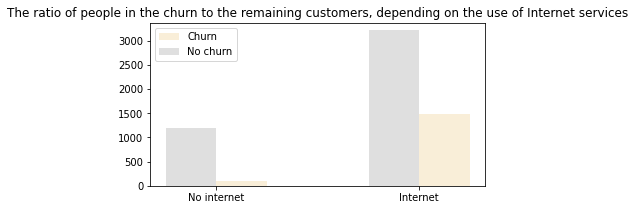

In [41]:
plt.figure(figsize=(6, 3))
plt.bar(internet_df.columns, internet_df.iloc[1, :], width=0.25, align='edge', color='wheat', alpha=0.5, label='Churn')
plt.bar(internet_df.columns, internet_df.iloc[0, :], width=-0.25, align='edge', color='silver', alpha=0.5, label='No churn')
plt.legend()
plt.xticks([0, 1], ['No internet', 'Internet'])
plt.title('The ratio of people in the churn to the remaining customers, depending on the use of Internet services', fontsize=12)
plt.show()

In [42]:
# From the data obtained, it cannot be assumed that the reason is the quality of the connection provided,
# So, we need to test the hypothesis about the convenience of payment

paperbill_df = pd.crosstab(telecom_df.PaperlessBilling, telecom_df.SeniorCitizen)
paperbill_df

SeniorCitizen,0,1
PaperlessBilling,,
0,2230,228
1,2790,738


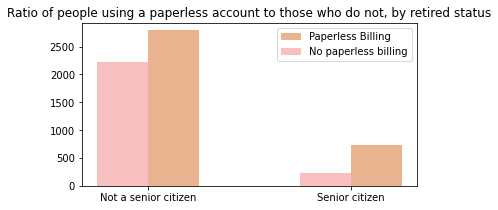

In [43]:
plt.figure(figsize=(6, 3))
plt.bar(paperbill_df.columns, paperbill_df.iloc[1, :], width=0.25, align='edge', color='chocolate', alpha=0.5, label='Paperless Billing')
plt.bar(paperbill_df.columns, paperbill_df.iloc[0, :], width=-0.25, align='edge', color='lightcoral', alpha=0.5, label='No paperless billing')
plt.legend()
plt.xticks([0, 1], ['Not a senior citizen', 'Senior citizen'])
plt.title('Ratio of people using a paperless account to those who do not, by retired status', fontsize=12)
plt.show()

# It can be seen from the data and graph that the number of people of retirement age using a paperless account, in relation to those
# who do not use one, much less than the company's younger customers.
# Perhaps part of the reason for the churn of pensioners lies in this.
# Perhaps the company should pay attention to this and think about how to facilitate the system of payments for pensioners.

In [44]:
# Now let's turn to all customers, regardless of age, and see how having a paperless account affects churn.

paperchurn_df = pd.crosstab(telecom_df.Churn, telecom_df.PaperlessBilling)
paperchurn_df

PaperlessBilling,0,1
Churn,,
0,2052,2347
1,406,1181


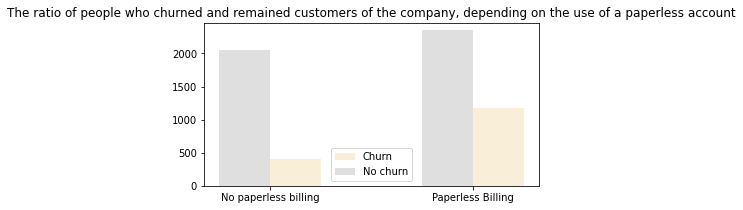

In [45]:
plt.figure(figsize=(6, 3))
plt.bar(paperchurn_df.columns, paperchurn_df.iloc[1, :], width=0.25, align='edge', color='wheat', alpha=0.5, label='Churn')
plt.bar(paperchurn_df.columns, paperchurn_df.iloc[0, :], width=-0.25, align='edge', color='silver', alpha=0.5, label='No churn')
plt.legend()
plt.xticks([0, 1], ['No paperless billing', 'Paperless Billing'])
plt.title('The ratio of people who churned and remained customers of the company, depending on the use of a paperless account', fontsize=12)
plt.show()

# It also shows that the ratio of people in churn to existing customers is much higher for those with a paperless account,
# than those who use paper.
# That is, a person using a paperless account is more likely to churn.
# Perhaps the company should consider making its payment system more transparent and convenient
# And somehow modify your paperless billing

In [46]:
# Now let's look at the dynamics of changes in number of people who went into churn, depending on the number of connected services.

serv_churn = pd.crosstab(telecom_df.Churn, telecom_df.TotalService)
serv_churn

TotalService,1,2,4,5,6,7,8,9
Churn,,,,,,,,
0,908,284,96,359,851,1001,727,173
1,89,10,74,242,565,421,176,10


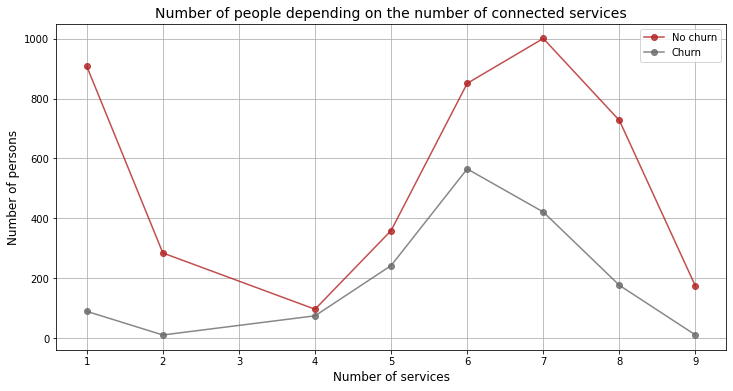

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(serv_churn.columns, serv_churn.iloc[0, :], color = 'firebrick', alpha=0.8, label='No churn', marker='o')
plt.plot(serv_churn.columns, serv_churn.iloc[1, :], color = 'dimgrey', alpha=0.8, label='Churn', marker='o')
plt.grid()
plt.title('Number of people depending on the number of connected services', fontsize=14)
plt.xlabel('Number of services', fontsize=12)
plt.ylabel('Number of persons', fontsize=12)
plt.legend()
plt.show()

# It can be seen that the actual safe area is 1 - 2 services per person,
# There is also a small chance that a person will churn if he has the maximum number of services connected (8-9)
# These are reliable clients
# Most likely that a person will go into outflow with an average number of services (4-5), close to 0.5

In [48]:
# We looked at the relation between churn and the number of connected services
# Which directly correlates with the size of the monthly payment
# Now let's look at the relation between churn and the presence of dependent family members among clients,
# Since these types of clients may be sensitive to the amount of the monthly payment

churn_dep = pd.crosstab(telecom_df.Churn, telecom_df.Dependents)
churn_dep

Dependents,0,1
Churn,,
0,2889,1510
1,1306,281


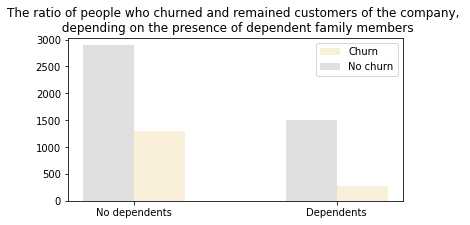

In [49]:
plt.figure(figsize=(6, 3))
plt.bar(churn_dep.columns, churn_dep.iloc[1, :], width=0.25, align='edge', color='wheat', alpha=0.5, label='Churn')
plt.bar(churn_dep.columns, churn_dep.iloc[0, :], width=-0.25, align='edge', color='silver', alpha=0.5, label='No churn')
plt.legend()
plt.xticks([0, 1], ['No dependents', 'Dependents'])
plt.title('The ratio of people who churned and remained customers of the company, \n depending on the presence of dependent family members', fontsize=12)
plt.show()

# The hypothesis was not confirmed,
# However, in this case, the company should carefully consider all customers with an average number of services
# And, accordingly, the average monthly payment
# In order not to miss those who can go into the outflow

In [50]:
# Finally, before proceeding to the selection of features and directly to the construction of ML models
# consider the ratio of the duration of use of the company's services and the number of people in the outflow

churn_tenure = pd.crosstab(telecom_df.Churn, telecom_df.tenure)
churn_tenure

tenure,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,10,192,90,87,81,59,62,70,73,60,63,58,64,57,43,55,46,54,65,48,47,40,53,53,61,50,54,55,38,48,47,41,48,44,45,61,34,44,39,33,41,47,44,47,42,42,49,51,45,42,49,55,56,44,43,47,58,52,51,44,60,54,61,60,68,56,63,73,81,71,80,147,304
1,0,318,104,82,73,52,36,41,37,37,39,27,33,29,20,28,24,19,18,16,16,14,23,12,18,19,12,12,11,14,13,15,17,12,10,13,9,12,10,11,13,12,13,15,5,5,12,11,9,13,9,8,6,13,12,8,10,7,10,8,5,6,5,2,3,9,11,8,8,6,10,5,4


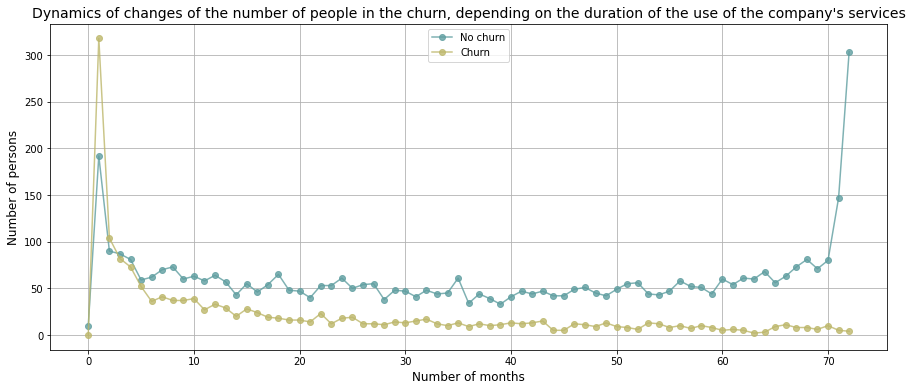

In [78]:
plt.figure(figsize=(15, 6))
plt.plot(churn_tenure.columns, churn_tenure.iloc[0, :], color='cadetblue', alpha=0.8, label='No churn', marker='o')
plt.plot(churn_tenure.columns, churn_tenure.iloc[1, :], color='darkkhaki', alpha=0.8, label='Churn', marker='o')
plt.title("Dynamics of changes of the number of people in the churn, depending on the duration of the use of the company's services", fontsize=14)
plt.xlabel('Number of months', fontsize=12)
plt.ylabel('Number of persons', fontsize=12)
plt.grid()
plt.legend()
plt.show()


# In general, as the duration of use of the company's services increases, the number of people to churn decreases
# Biggest churn after one month of using services
# which means that it is worth paying attention to this segment of users

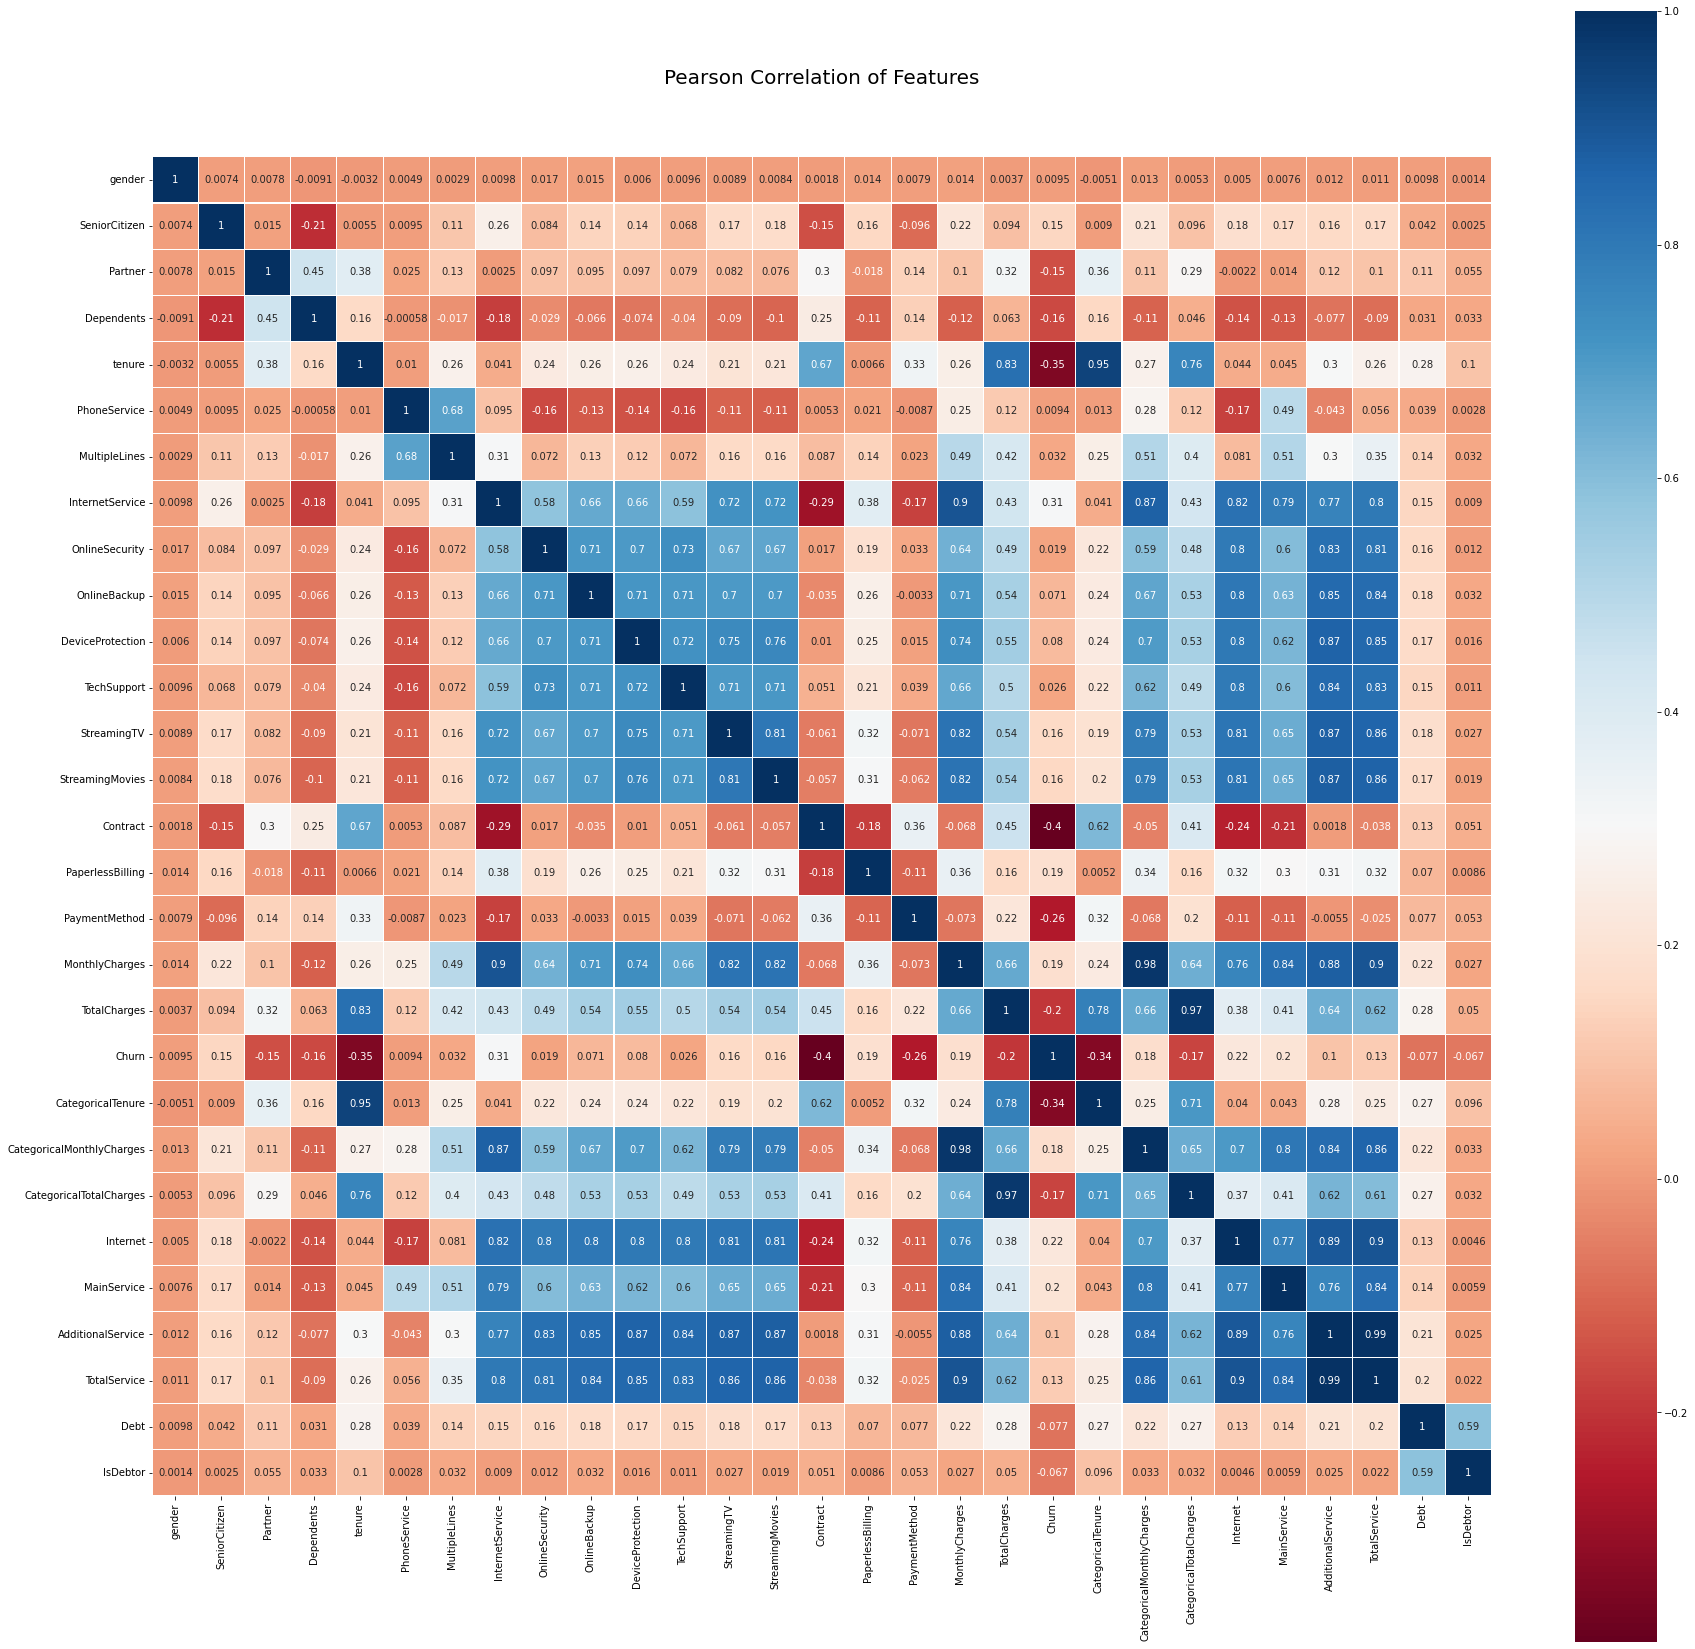

In [53]:
# Now let's start selecting features for machine learning models,
# They should not be strongly correlated with each other
# Therefore, it is worth getting rid of those
# To do this, we will build a correlation matrix

colormap = plt.cm.RdBu
plt.figure(figsize=(30, 30))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(telecom_df.astype(float).corr(), linewidth=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [54]:
# Remove redundant features that may adversely affect the quality of ML models 

features = telecom_df.drop(['Internet', 'CategoricalMonthlyCharges', 'MonthlyCharges', 'OnlineSecurity', 'OnlineBackup', 'MainService', 'AdditionalService', 'InternetService', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'tenure', 'TotalCharges', 'Churn'], axis=1)

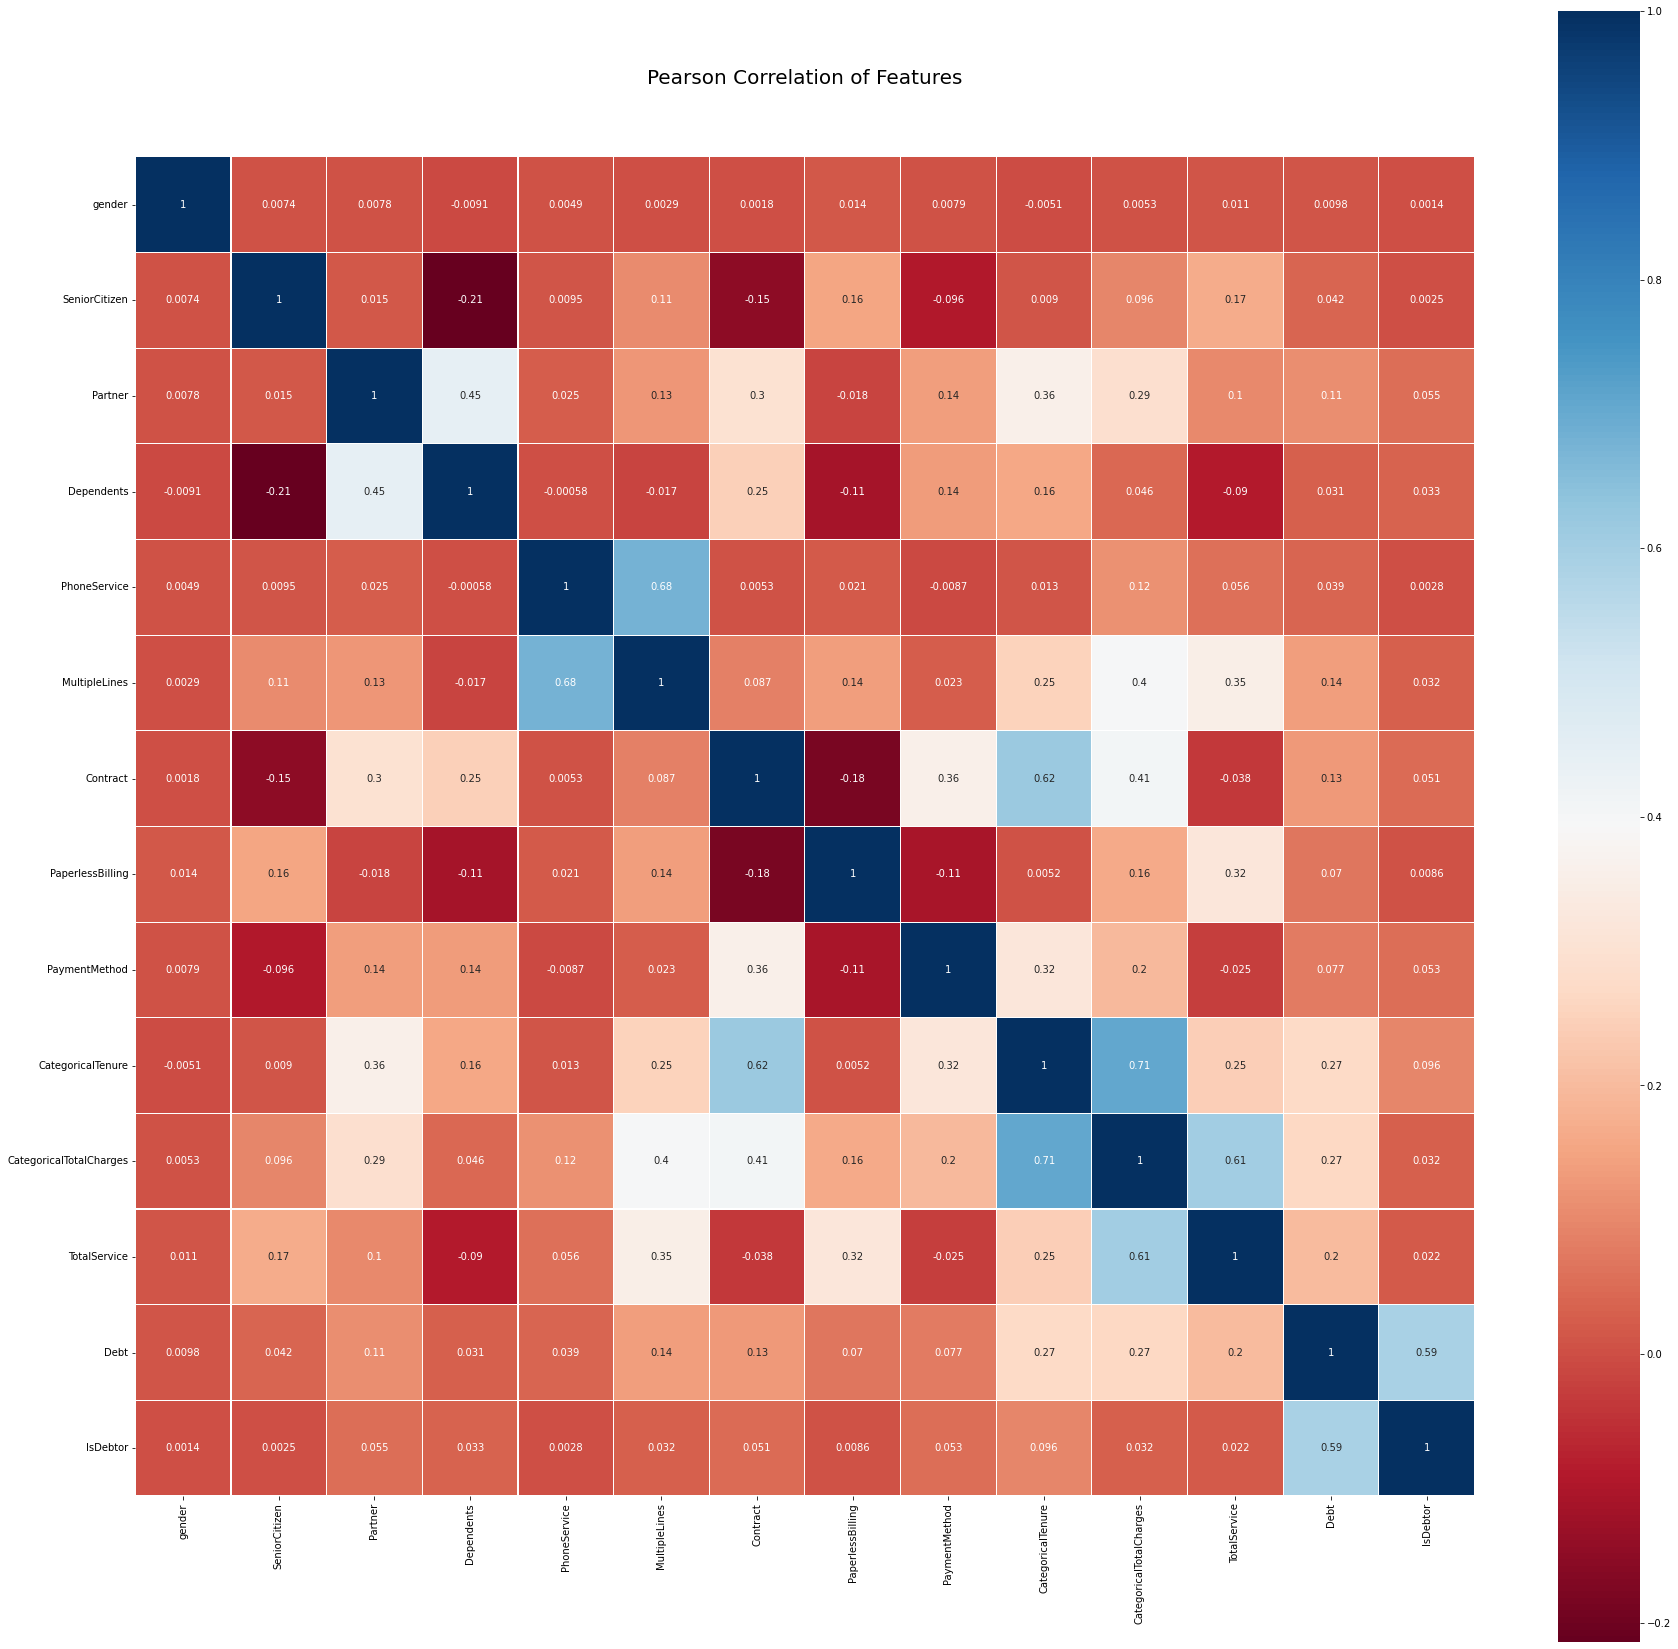

In [55]:
# Once again build a correlation matrix for all features, checking for strong relation

colormap = plt.cm.RdBu
plt.figure(figsize=(30, 30))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(features.astype(float).corr(), linewidth=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

# Now everything is fine, there are several variables that correlate with each other, but this is not critical

# 3. Building Models to Predict Churn

In [56]:
# We are faced with a binary classification task, while the data is unbalanced,
# that is, one class greatly outnumbers the other.
# As a model quality metric, we will use the recall score (completeness)
# It will help minimize the risk of missing even one positive result.
# The positive class in our case is those who churn.

In [57]:
# Separate the target variable from the dataframe

targets = telecom_df.Churn.values

In [58]:
# We will build several machine learning models, try to tune the parameters for them as well as possible,
# and see how well they predict churn
# Among them:
# - naive Bayesian classifier (because it considers features independently of each other)
# - K nearest neighbors method (the simplest model that can be easily tuned)
# - decision tree (easy to interpret model and you can choose the best parameters on cross-validation)
# - logistic regression (it works with binary classification, which is what we need)
# - stacking (if no model shows a satisfactory result, we will try to use it)

In [59]:
# Divide our data into training and test sets with a test set size of 25%

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.25, random_state=42)

In [60]:
# 1 Naive Bayesian Classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score

In [61]:
# We build a model, make a prediction and determine the quality of the model using recall_score (completeness)

nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)
nb_predictions = nb_model.predict(x_test)
nb_recall = recall_score(y_test, nb_predictions)
print(f'Naive Bayes recall score: {nb_recall}')

Naive Bayes recall score: 0.7116883116883117


In [62]:
# 2. K - Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

In [63]:
neighbors = list(range(1, 21))
knn_recall_list = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn_model = knn.fit(x_train, y_train)
    knn_predictions = knn_model.predict(x_test)
    knn_recall = recall_score(y_test, knn_predictions)
    knn_recall_list.append(knn_recall)
best_knn_score = max(knn_recall_list)
print(f'Количество соседей для оценивания: {np.argmax(knn_recall_list) + 1}')
print(f'K Nearest Neighbors recall score: {best_knn_score}')

# The best recall score is achieved when the number of nearest neighbors is 1.
# But it is still quite low, so this algorithm is not suitable for us

Количество соседей для оценивания: 1
K Nearest Neighbors recall score: 0.4805194805194805


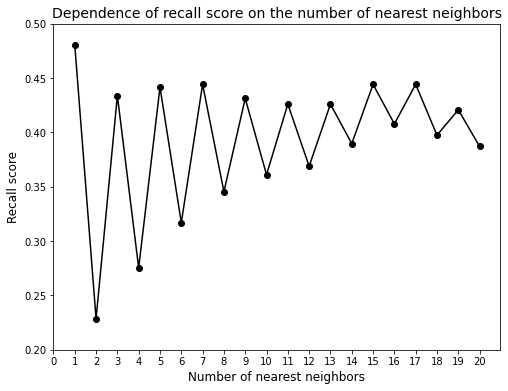

In [64]:
# Visualize the recall score depending on the number of neighbors

plt.figure(figsize=(8, 6))
plt.plot(list(range(1, 21)), knn_recall_list, marker='o', color='k')
plt.xticks(list(range(21)))
plt.ylim([0.2, 0.5])
plt.title('Dependence of recall score on the number of nearest neighbors', fontsize=14)
plt.xlabel('Number of nearest neighbors', fontsize=12)
plt.ylabel('Recall score', fontsize=12)
plt.show()

In [65]:
# 3. Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [66]:
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(x_train, y_train)
dtc_predictions = dtc_model.predict(x_test)
dtc_recall = recall_score(y_test, dtc_predictions)
print(f'Decision Tree Classifier recall score: {dtc_recall}')

Decision Tree Classifier recall score: 0.45714285714285713


In [67]:
# recall_score is again quite low, let's try to adjust the parameters on cross_validation

from sklearn.model_selection import GridSearchCV

tree_params = {'max_depth': range(1, 6), 
              'max_features': range(1, 15)}

tree_grid = GridSearchCV(dtc, tree_params, cv=5)
grid_model = tree_grid.fit(x_train, y_train)
model_best_params = tree_grid.best_params_

print(model_best_params)

predicted = tree_grid.predict(x_test)
grid_recall = recall_score(y_test, predicted)
print(f'Grid search recall score: {grid_recall}')

{'max_depth': 5, 'max_features': 6}
Grid search recall score: 0.36883116883116884


In [68]:
# 4. LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [69]:
lr = LogisticRegression(random_state=42)
pipe = make_pipeline(StandardScaler(), lr)
lr_model = pipe.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_test)
lr_recall = recall_score(y_test, lr_predictions)
print(f'Logistic Regression recall score: {lr_recall}')

Logistic Regression recall score: 0.4805194805194805


In [70]:
# 5. All models show low classification accuracy,
# So you can combine them into stacking and see how well it will perform
# Take xgboost as a meta-algorithm

from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [71]:
meta = XGBClassifier(n_estimators=40)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=1)
dtc = DecisionTreeClassifier(max_depth=5, max_features=5, random_state=42)
lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

models = [nb, knn, dtc, lr]

In [72]:
# Stacking function

def stacking(models, meta_alg, data_train, targets_train, data_test, targets_test=None, random_state=None, test_size=None, cv=5):
    if test_size is None:
        meta_mtrx = np.empty((data_train.shape[0], len(models)))
        
        skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
        for n, model in enumerate(models):
            meta_mtrx[:, n] = cross_val_predict(model, data_train, targets_train, cv=skf, method='predict')
            model.fit(data_train, targets_train)
            
        meta_model = meta_alg.fit(meta_mtrx, targets_train)
        
        meta_mtrx_test = np.empty((data_test.shape[0], len(models)))
        
        for n, model in enumerate(models):
            meta_mtrx_test[:, n] = model.predict(data_test)
            
        meta_predict = meta_alg.predict(meta_mtrx_test)
        
        if targets_test is not None:
            print(f'Stacking recall: {recall_score(targets_test, meta_predict)}')
        
        return recall_score(targets_test, meta_predict), meta_predict
    
    elif test_size > 0 and test_size < 1:
        x_train, valid, y_train, valid_true = train_test_split(data_train, targets_train, test_size=test_size, random_state=42)
        
        meta_mtrx = np.empty((valid.shape[0], len(models)))
        
        for n, model in enumerate(models):
            model = model.fit(x_train, y_train)
            meta_mtrx[:, n] = model.predict(valid)
        
        meta_model = meta_alg.fit(meta_mtrx, valid_true)
        
        meta_mtrx_test = np.empty((data_test.shape[0], len(models)))
        
        for n, model in enumerate(models):
            meta_mtrx_test[:, n] = model.predict(data_test)
            
        meta_predict = meta_model.predict(meta_mtrx_test)
        
        if targets_test is not None:
            print(f'Stacking recall: {recall_score(targets_test, meta_predict)}')
        
        return recall_score(targets_test, meta_predict), meta_predict  
    
    else:
        raise ValueError("test_size must be between 0 and 1")
            

In [73]:
stack = stacking(models, meta, x_train, y_train, x_test, y_test, test_size=0.25)
print(stack)

Stacking recall: 0.4675324675324675
(0.4675324675324675, array([1, 0, 0, ..., 0, 1, 0]))


In [74]:
# The quality of the models is low, so let's try again, selecting other features:
# Remove the target variable, and scale variables this time, leave the rest.

# But first, let's create a dictionary in which we will store the recall_score for all models so that they can be compared later

recall_dict = {'Naive_Bayes': [nb_recall], 'K_Nearest_Neighbors': [best_knn_score], 'Decision_Tree_Classifier': [grid_recall], 
              'Logistic_Regression': [lr_recall], 'Stacking': [stack[0]]}

# Этап 2
features = telecom_df.drop(['Churn', 'TotalService', 'MonthlyCharges', 'TotalCharges', 'tenure'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.25, random_state=42)

print('Naive Bayes')
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)
nb_predictions = nb_model.predict(x_test)
nb_recall = recall_score(y_test, nb_predictions)
print(f'Naive Bayes recall score: {nb_recall}')
recall_dict['Naive_Bayes'].append(nb_recall)
print()
print()

print('K Nearest Neighbors')
neighbors = list(range(1, 21))
knn_recall_list = []
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn_model = knn.fit(x_train, y_train)
    knn_predictions = knn_model.predict(x_test)
    knn_recall = recall_score(y_test, knn_predictions)
    knn_recall_list.append(knn_recall)
best_knn_score = max(knn_recall_list)
recall_dict['K_Nearest_Neighbors'].append(best_knn_score)
print(f'Number of neighbors to evaluate: {np.argmax(knn_recall_list) + 1}')
print(f'K Nearest Neighbors recall score: {best_knn_score}')
print()
print()

print('Decision Tree Classifier')
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(x_train, y_train)
dtc_predictions = dtc_model.predict(x_test)
dtc_recall = recall_score(y_test, dtc_predictions)
print(f'Decision Tree Classifier recall score: {dtc_recall}')
tree_params = {'max_depth': range(1, 6), 
              'max_features': range(1, features.shape[1] + 1)}

tree_grid = GridSearchCV(dtc, tree_params, cv=5)
grid_model = tree_grid.fit(x_train, y_train)
model_best_params = tree_grid.best_params_

print(model_best_params)

predicted = tree_grid.predict(x_test)
grid_recall = recall_score(y_test, predicted)
print(f'Grid search recall score: {grid_recall}')
recall_dict['Decision_Tree_Classifier'].append(grid_recall)
print()
print()

print('Logistic Regression')
lr = LogisticRegression(random_state=42)
pipe = make_pipeline(StandardScaler(), lr)
lr_model = pipe.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_test)
lr_recall = recall_score(y_test, lr_predictions)
print(f'Logistic Regression recall score: {lr_recall}')
recall_dict['Logistic_Regression'].append(lr_recall)
print()
print()

print('Stacking')
meta = XGBClassifier(n_estimators=40)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=1)
dtc = DecisionTreeClassifier(max_depth=5, max_features=5, random_state=42)
lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

models = [nb, knn, dtc, lr]
stack = stacking(models, meta, x_train, y_train, x_test, y_test, test_size=0.25)
recall_dict['Stacking'].append(stack[0])


Naive Bayes
Naive Bayes recall score: 0.787012987012987


K Nearest Neighbors
Number of neighbors to evaluate: 9
K Nearest Neighbors recall score: 0.5116883116883116


Decision Tree Classifier
Decision Tree Classifier recall score: 0.4597402597402597
{'max_depth': 3, 'max_features': 18}
Grid search recall score: 0.3922077922077922


Logistic Regression
Logistic Regression recall score: 0.509090909090909


Stacking
Stacking recall: 0.509090909090909


In [75]:
# We managed to improve the quality of the models a little, however, let's do one more try,
# discard only the target variable from the dataframe
# Stage 3

features = telecom_df.drop(['Churn'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.25, random_state=42)

print('Naive Bayes')
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)
nb_predictions = nb_model.predict(x_test)
nb_recall = recall_score(y_test, nb_predictions)
print(f'Naive Bayes recall score: {nb_recall}')
recall_dict['Naive_Bayes'].append(nb_recall)
print()
print()

print('K Nearest Neighbors')
neighbors = list(range(1, 21))
knn_recall_list = []
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn_model = knn.fit(x_train, y_train)
    knn_predictions = knn_model.predict(x_test)
    knn_recall = recall_score(y_test, knn_predictions)
    knn_recall_list.append(knn_recall)
best_knn_score = max(knn_recall_list)
recall_dict['K_Nearest_Neighbors'].append(best_knn_score)
print(f'Number of neighbors to evaluate: {np.argmax(knn_recall_list) + 1}')
print(f'K Nearest Neighbors recall score: {best_knn_score}')
print()
print()

print('Decision Tree Classifier')
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(x_train, y_train)
dtc_predictions = dtc_model.predict(x_test)
dtc_recall = recall_score(y_test, dtc_predictions)
print(f'Decision Tree Classifier recall score: {dtc_recall}')
tree_params = {'max_depth': range(1, 6), 
              'max_features': range(1, features.shape[1] + 1)}

tree_grid = GridSearchCV(dtc, tree_params, cv=5)
grid_model = tree_grid.fit(x_train, y_train)
model_best_params = tree_grid.best_params_

print(model_best_params)

predicted = tree_grid.predict(x_test)
grid_recall = recall_score(y_test, predicted)
print(f'Grid search recall score: {grid_recall}')
recall_dict['Decision_Tree_Classifier'].append(grid_recall)
print()
print()

print('Logistic Regression')
lr = LogisticRegression(random_state=42)
pipe = make_pipeline(StandardScaler(), lr)
lr_model = pipe.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_test)
lr_recall = recall_score(y_test, lr_predictions)
print(f'Logistic Regression recall score: {lr_recall}')
recall_dict['Logistic_Regression'].append(lr_recall)
print()
print()

print('Stacking')
meta = XGBClassifier(n_estimators=40)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=1)
dtc = DecisionTreeClassifier(max_depth=5, max_features=5, random_state=42)
lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

models = [nb, knn, dtc, lr]
stack = stacking(models, meta, x_train, y_train, x_test, y_test, test_size=0.25)
recall_dict['Stacking'].append(stack[0])


Naive Bayes
Naive Bayes recall score: 0.7714285714285715


K Nearest Neighbors
Number of neighbors to evaluate: 1
K Nearest Neighbors recall score: 0.44415584415584414


Decision Tree Classifier
Decision Tree Classifier recall score: 0.5324675324675324
{'max_depth': 4, 'max_features': 18}
Grid search recall score: 0.4675324675324675


Logistic Regression
Logistic Regression recall score: 0.5376623376623376


Stacking
Stacking recall: 0.4831168831168831


# 4. Comparison of the quality of models

In [76]:
# Now let's analyze the results

recall_df = pd.DataFrame(recall_dict, columns=recall_dict.keys())
recall_df

,Naive_Bayes,K_Nearest_Neighbors,Decision_Tree_Classifier,Logistic_Regression,Stacking
0,0.711688,0.480519,0.368831,0.480519,0.467532
1,0.787013,0.511688,0.392208,0.509091,0.509091
2,0.771429,0.444156,0.467532,0.537662,0.483117


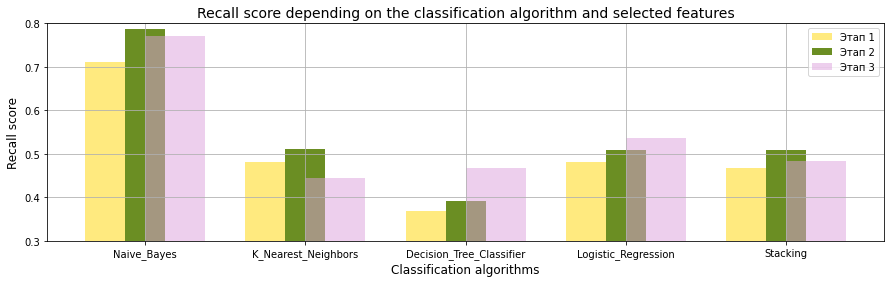

In [77]:
# Visualize the results

color_dict = {0: 'gold',
              1: 'olivedrab',
              2: 'plum'}

align_dict = {0: 'edge',
              1: 'center',
              2: 'edge'}

width_dict = {0: -0.375,
              1: 0.25,
              2: 0.375}

alpha_dict = {0: 0.5,
              1: 1,
              2: 0.5}

plt.figure(figsize=(15, 4))
for i in range(3):
    plt.bar(recall_df.columns, recall_df.iloc[i, :], width=width_dict[i], align = align_dict[i], alpha=alpha_dict[i], color=color_dict[i], label=f'Этап {i + 1}')
plt.ylim([0.3, 0.8])
plt.grid()
plt.title('Recall score depending on the classification algorithm and selected features', fontsize=14)
plt.xlabel('Classification algorithms', fontsize=12)
plt.ylabel('Recall score', fontsize=12)
plt.legend()
plt.show()


The best **recall score** at all stages, regardless of which features were used by the algorithm, is given by ***Naive Bayes Classifier***. The best score - **0.787013** - was obtained at the second stage, when only quantitative variables were removed, and the rest were used by the algorithm.
Worst of all worked ***Decision Tree Classifier***.
Basically, all algorithms worked better at the second stage, except for ***Decision Tree Classifier*** and ***Logistic Regression***, where the best score for the algorithm was obtained at the third stage, when, among others, quantitative variables were considered.

***Conclusions: ***

1. The most preferred classification algorithm for this task is the **naive Bayesian classifier**.

2. An appropriate metric to measure the quality of classification is the recall score, which helps reduce the risk of missing a positive result (positive in this case means churn).

3. The most satisfactory selection of features for training the model includes all features (basic and derived), excluding quantitative ones.

4. In general, we can say that it is necessary to pay attention to customers who use the services of a telecommunications company for one month (perhaps consider discounts for the second month or package offers). The EDA showed that this sector is at the highest risk of outflow. With the increase in the time of using the services of the company, this risk decreases.

5. It is also necessary to pay attention to older users, the share of outflow in this segment of the company's customers is approximately 42%.

6. You should also pay attention to payment methods and add options. There may not be enough convenient options for everyone and this may be the reason for some of the churn of customers.